<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session9/S9V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-l2gyc47z
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-l2gyc47z
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=8eaa5d1998c3ce6a9c472761fcc33a8a32f793c9354c57cbd7ca2ab775e0f805
  Stored in directory: /tmp/pip-ephem-wheel-cache-kx8_vvdf/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/API'
sys.path.append(folder)


In [0]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms

In [0]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       #A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) # fillvalue is 0 after normalizing as mean is 0
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [4]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


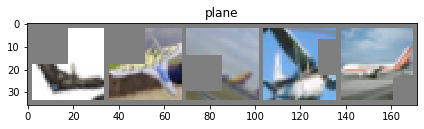

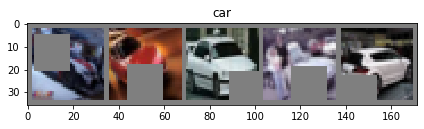

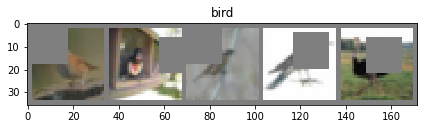

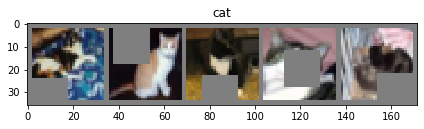

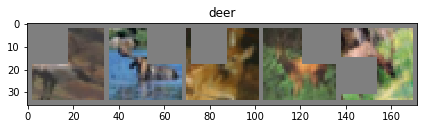

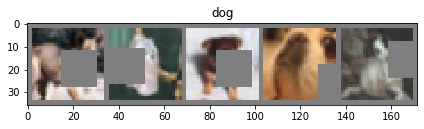

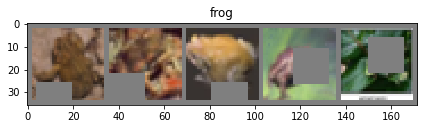

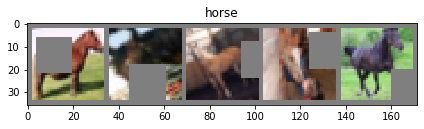

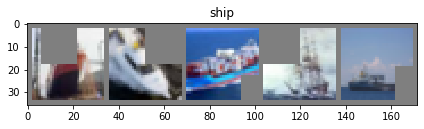

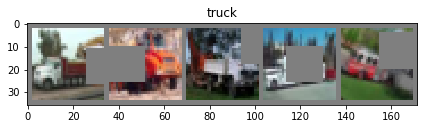

In [5]:
show_images.show_train_data(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [31]:
testLoss = []
testAcc = []
EPOCHS = 4
best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
     is_best = test_acc[-1] > best_acc1

     best_acc1 = max(test_acc[-1], best_acc1)
     save_checkpoint({
            'epoch': epoch + 1,
            
            'state_dict': model.state_dict(),
            'best_acc1': best_acc1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.010000000000000002


Loss=0.5781518220901489 Batch_id=390 Accuracy=81.49: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]



Test set: Average loss: 0.0032, Accuracy: 8624/10000 (86.24%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 2 LR: 0.010000000000000002


Loss=0.5574086904525757 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8613/10000 (86.13%)

EPOCH: 3 LR: 0.010000000000000002


Loss=0.52611243724823 Batch_id=390 Accuracy=81.72: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]



Test set: Average loss: 0.0030, Accuracy: 8709/10000 (87.09%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 4 LR: 0.0010000000000000002


Loss=0.4211484491825104 Batch_id=390 Accuracy=83.57: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]



Test set: Average loss: 0.0027, Accuracy: 8800/10000 (88.00%)



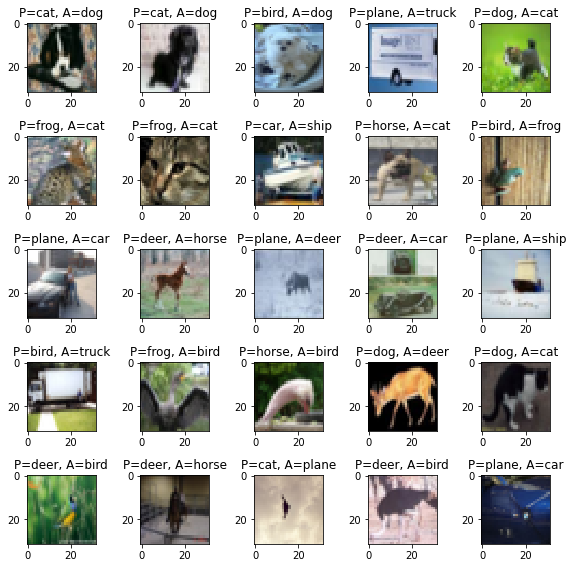

In [9]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [35]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 87 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 79 %
Accuracy of   car : 94 %
Accuracy of  bird : 63 %
Accuracy of   cat : 61 %
Accuracy of  deer : 77 %
Accuracy of   dog : 58 %
Accuracy of  frog : 81 %
Accuracy of horse : 76 %
Accuracy of  ship : 72 %
Accuracy of truck : 73 %


Text(0.5, 1.0, 'Test Accuracy')

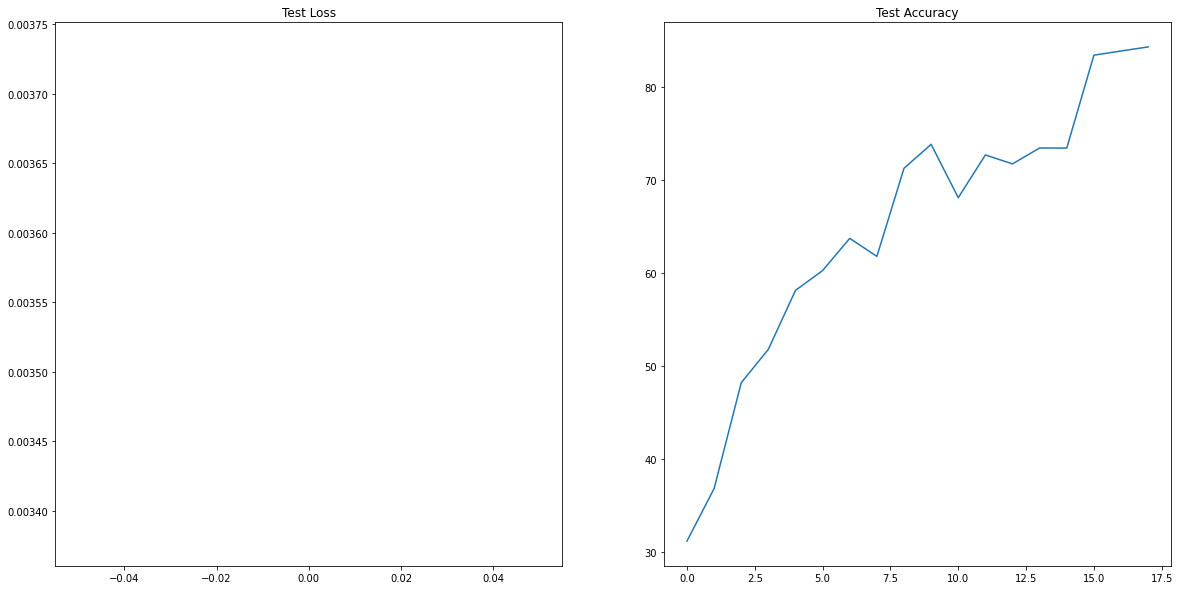

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")



In [21]:
print(test_loss)

0.0035558677554130553


In [32]:
print(test_acc)

[31.21, 36.86, 48.22, 51.82, 58.15, 60.28, 63.74, 61.8, 71.27, 73.84, 68.11, 72.7, 71.74, 73.45, 73.44, 83.42, 83.87, 84.31, 83.93, 84.92, 85.54, 85.65, 85.41, 85.72, 85.8, 86.25, 86.61, 86.24, 86.13, 87.09, 88.0]


In [0]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [0]:
import shutil

In [33]:
len(test_acc)

31